<a href="https://colab.research.google.com/github/ThanushHassan/FUTURE_DS_03/blob/main/Event_feedback_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas matplotlib seaborn textblob vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [4]:
df = pd.read_csv("/content/event_feedback.csv")
df.head()


,Timestamp,Event Name,Overall Rating (1–5),Which session did you like the most?,What did you dislike?,Suggestions for improvement
0,2025-01-01 10:00,Tech Fest,5,AI Workshop,Long waiting time,Improve event scheduling
1,2025-01-01 10:05,Tech Fest,4,Guest Lecture,Audio issues,Better sound system
2,2025-01-01 10:10,Cultural Fest,3,Dance Show,Crowd management,More volunteers needed
3,2025-01-01 10:15,Coding Bootcamp,5,Python Session,Nothing,More hands-on sessions
4,2025-01-01 10:20,Tech Fest,4,Robotics Demo,Limited seating,Increase seating capacity


In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Timestamp                             8 non-null      object
 1   Event Name                            8 non-null      object
 2   Overall Rating (1–5)                  8 non-null      int64 
 3   Which session did you like the most?  7 non-null      object
 4   What did you dislike?                 8 non-null      object
 5   Suggestions for improvement           8 non-null      object
dtypes: int64(1), object(5)
memory usage: 516.0+ bytes


,0
Timestamp,0
Event Name,0
Overall Rating (1–5),0
Which session did you like the most?,1
What did you dislike?,0
Suggestions for improvement,0


In [6]:
df.columns


Index(['Timestamp', 'Event Name', 'Overall Rating (1–5)',
       'Which session did you like the most?', 'What did you dislike?',
       'Suggestions for improvement'],
      dtype='object')

In [7]:
['Timestamp',
 'Event Name',
 'Overall Rating (1–5)',
 'Which session did you like the most?',
 'What did you dislike?',
 'Suggestions for improvement']


['Timestamp',
 'Event Name',
 'Overall Rating (1–5)',
 'Which session did you like the most?',
 'What did you dislike?',
 'Suggestions for improvement']

In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("–", "-")
df.columns


Index(['timestamp', 'event_name', 'overall_rating_(1-5)',
       'which_session_did_you_like_the_most?', 'what_did_you_dislike?',
       'suggestions_for_improvement'],
      dtype='object')

In [9]:
df = df.dropna(subset=['suggestions_for_improvement'])


In [10]:
from textblob import TextBlob

df['sentiment_score'] = df['suggestions_for_improvement'].apply(
    lambda x: TextBlob(x).sentiment.polarity
)



In [11]:
def sentiment_label(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['sentiment_score'].apply(sentiment_label)


In [12]:
df[['suggestions_for_improvement', 'sentiment_score', 'sentiment']]


,suggestions_for_improvement,sentiment_score,sentiment
0,Improve event scheduling,0.00,Neutral
1,Better sound system,0.45,Positive
2,More volunteers needed,0.50,Positive
3,More hands-on sessions,0.50,Positive
4,Increase seating capacity,0.00,Neutral
5,Improve lighting setup,0.00,Neutral
6,Extend session duration,0.00,Neutral
7,Better communication and planning,0.50,Positive


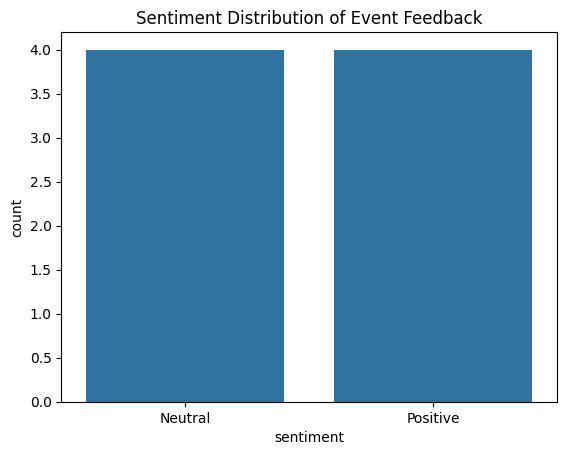

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution of Event Feedback")
plt.show()


In [14]:
df['overall_rating_(1-5)'].mean()


np.float64(3.875)

In [15]:
df.to_csv("final_event_feedback_with_sentiment.csv", index=False)
